🚀 開始建構 PyTorch LSTM 模型...
🎯 鎖定訓練站點代號: 500101001
✅ 數據準備完成！Tensor 形狀: torch.Size([552, 3, 1])
🔥 開始 PyTorch 模型訓練...
Epoch [10/50], Loss: 0.0440
Epoch [20/50], Loss: 0.0320
Epoch [30/50], Loss: 0.0256
Epoch [40/50], Loss: 0.0197
Epoch [50/50], Loss: 0.0188


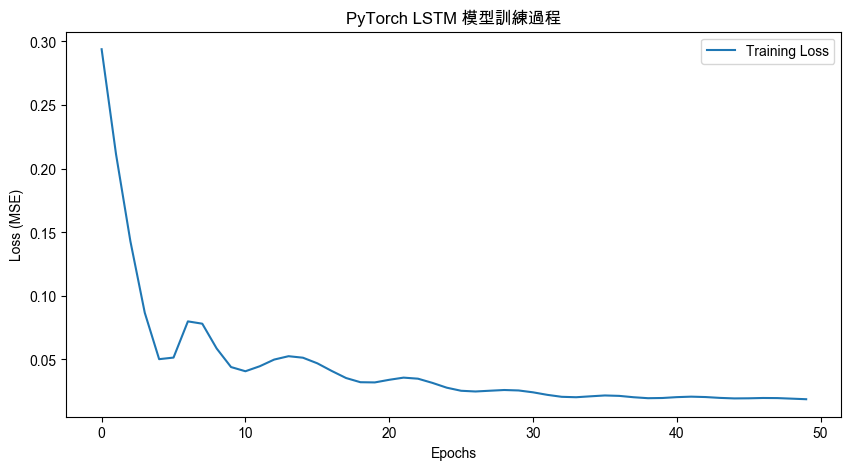

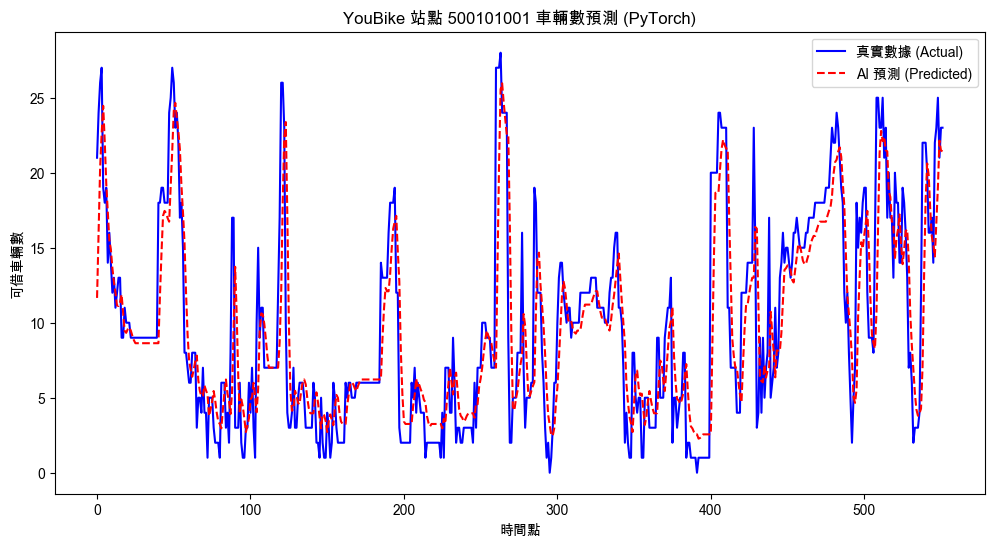

🎉 恭喜！你成功用 PyTorch 訓練出 LSTM 模型了！


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

print("🚀 開始建構 PyTorch LSTM 模型...")

# 1. 讀取處理好的資料
data_path = '../data/processed/youbike_weather_merged.csv'
df = pd.read_csv(data_path)
df['record_time'] = pd.to_datetime(df['record_time'])

# 2. 挑選訓練站點 (資料最多的那一站)
top_station = df['station_no'].value_counts().idxmax()
print(f"🎯 鎖定訓練站點代號: {top_station}")
df_station = df[df['station_no'] == top_station].sort_values('record_time')

# 準備訓練資料 (只取車輛數)
data = df_station[['bikes_available']].values.astype(float)

# 3. 數據正規化 (歸一化到 0~1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 4. 製作時間視窗 (Time Window)
prediction_days = 3 # 用過去 3 小時預測下 1 小時

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

# 轉成 PyTorch Tensor 格式
x_train = torch.from_numpy(x_train).float().unsqueeze(2) # 增加一個維度變成 (Batch, Seq, Feature)
y_train = torch.from_numpy(y_train).float().unsqueeze(1)

print(f"✅ 數據準備完成！Tensor 形狀: {x_train.shape}")

# 5. 定義 LSTM 模型架構 (Class-based 寫法，面試官最愛)
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        # LSTM 層
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        # 全連接層 (輸出預測值)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        # out shape: (batch, seq_len, hidden_size)
        out, _ = self.lstm(x)
        # 取最後一個時間點的輸出
        out = out[:, -1, :]
        out = self.fc(out)
        return out

model = LSTMModel()
criterion = nn.MSELoss() # 損失函數
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 優化器

# 6. 開始訓練 (Training Loop)
epochs = 50
loss_history = []

print("🔥 開始 PyTorch 模型訓練...")
for epoch in range(epochs):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 7. 畫出 Loss 曲線
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('PyTorch LSTM 模型訓練過程')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# 8. 預測視覺化 (拿訓練資料來預測看看)
model.eval()
with torch.no_grad():
    predicted = model(x_train).numpy()

# 反正規化 (轉回原本的車輛數)
predicted_actual = scaler.inverse_transform(predicted)
y_train_actual = scaler.inverse_transform(y_train.numpy())

plt.figure(figsize=(12, 6))
plt.plot(y_train_actual, label='真實數據 (Actual)', color='blue')
plt.plot(predicted_actual, label='AI 預測 (Predicted)', color='red', linestyle='--')
plt.title(f'YouBike 站點 {top_station} 車輛數預測 (PyTorch)')
plt.xlabel('時間點')
plt.ylabel('可借車輛數')
plt.legend()
plt.show()

print("🎉 恭喜！你成功用 PyTorch 訓練出 LSTM 模型了！")

🚀 開始建構【多變量】Multivariate LSTM 模型 (車輛 + 氣溫 + 降雨)...
🎯 鎖定訓練站點: 500101001
⚠️ 補值前的空值數量：
bikes_available      0
temperature        108
rain               108
dtype: int64
✅ 補值後的空值數量 (應該要是 0)：
bikes_available    0
temperature        0
rain               0
dtype: int64
✅ 數據準備完成！
   輸入特徵數 (Features): 3 (應該是3)
   訓練樣本數: 552
🔥 開始多變量模型訓練...
Epoch [10/100], Loss: 0.0516
Epoch [20/100], Loss: 0.0330
Epoch [30/100], Loss: 0.0248
Epoch [40/100], Loss: 0.0208
Epoch [50/100], Loss: 0.0194
Epoch [60/100], Loss: 0.0172
Epoch [70/100], Loss: 0.0144
Epoch [80/100], Loss: 0.0138
Epoch [90/100], Loss: 0.0130
Epoch [100/100], Loss: 0.0142


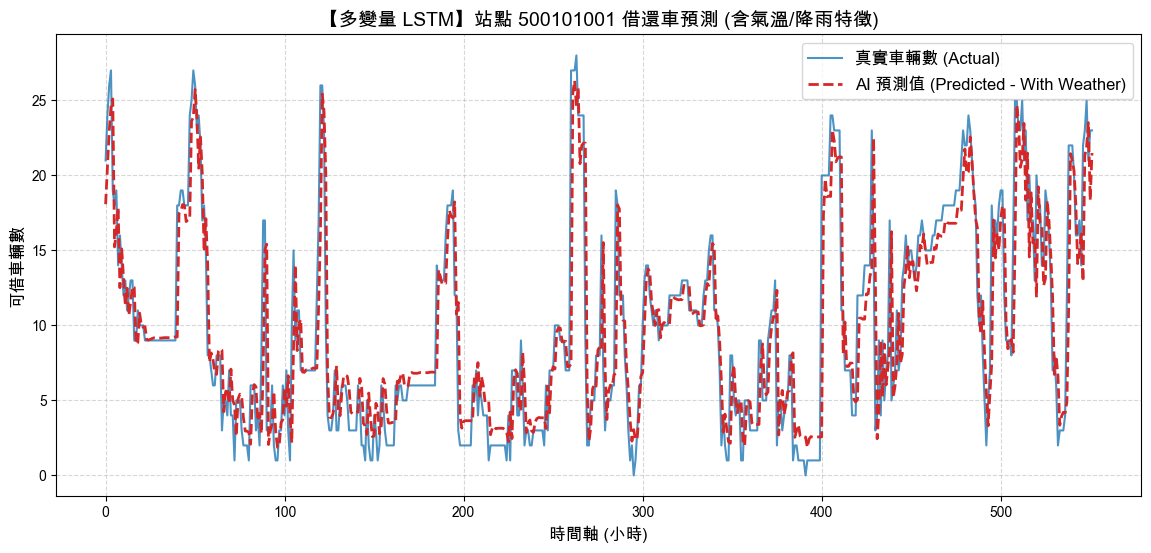

🎉 大功告成！這是真正的 AI 預測模型！


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# --- 0. 設定中文字體 (Mac 專用) ---
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

print("🚀 開始建構【多變量】Multivariate LSTM 模型 (車輛 + 氣溫 + 降雨)...")

# --- 1. 讀取與整理資料 (修正版) ---
data_path = '../data/processed/youbike_weather_merged.csv'
df = pd.read_csv(data_path)
df['record_time'] = pd.to_datetime(df['record_time'])

# 鎖定資料最多的站點
top_station = df['station_no'].value_counts().idxmax()
print(f"🎯 鎖定訓練站點: {top_station}")
df_station = df[df['station_no'] == top_station].sort_values('record_time')

# 【關鍵修改】：選取特徵並「清洗資料」
features = ['bikes_available', 'temperature', 'rain']
df_features = df_station[features].copy() # 建立一個副本

# 🕵️‍♂️ 檢查有沒有空值
print("⚠️ 補值前的空值數量：")
print(df_features.isnull().sum())

# 🧹 數據淨水器：填補空值 (使用前一小時的資料補目前的空缺)
df_features = df_features.ffill().bfill() 

print("✅ 補值後的空值數量 (應該要是 0)：")
print(df_features.isnull().sum())

# 轉成 numpy array 準備餵給模型
data = df_features.values.astype(float)

# --- 2. 數據正規化 ---
# 注意：這裡Scaler會記住 3 個欄位的比例
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# --- 3. 製作多變量序列數據 ---
prediction_days = 3 # 用過去 3 小時 (含氣溫/降雨)

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    # 輸入：過去 3 小時的 [車, 溫, 雨] (形狀: 3x3)
    x_train.append(scaled_data[x-prediction_days:x, :]) 
    # 預測目標：下 1 小時的 [車] (它是第 0 欄)
    y_train.append(scaled_data[x, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train)

# 轉成 PyTorch Tensor
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float().unsqueeze(1)

print(f"✅ 數據準備完成！")
print(f"   輸入特徵數 (Features): {x_train.shape[2]} (應該是3)")
print(f"   訓練樣本數: {x_train.shape[0]}")

# --- 4. 定義 LSTM 模型 (動態調整輸入維度) ---
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        # 增加一個 Dropout 層防止過擬合
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :] # 取最後時間點
        out = self.dropout(out)
        out = self.fc(out)
        return out

# 初始化模型：input_size=3 (因為我們有車、溫、雨)
model = LSTMModel(input_size=3) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# --- 5. 開始訓練 ---
epochs = 100 # 多變量比較複雜，我們跑多一點
loss_history = []

print("🔥 開始多變量模型訓練...")
for epoch in range(epochs):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# --- 6. 視覺化結果 ---
model.eval()
with torch.no_grad():
    predicted = model(x_train).numpy()

# 【關鍵技巧】：反正規化 (Inverse Transform) 
# 因為 Scaler 預期輸入 3 欄，但預測結果只有 1 欄(車)，所以我們要造假資料來騙過 Scaler
# 1. 建立一個跟原始資料形狀一樣的空陣列
dummy_array = np.zeros((len(predicted), 3))
# 2. 把預測值填入第 0 欄 (車)
dummy_array[:, 0] = predicted.ravel()
# 3. 反正規化，並只取回第 0 欄
predicted_actual = scaler.inverse_transform(dummy_array)[:, 0]

# 真實值也要做一樣的事
dummy_y = np.zeros((len(y_train), 3))
dummy_y[:, 0] = y_train.numpy().ravel()
y_train_actual = scaler.inverse_transform(dummy_y)[:, 0]

# 畫圖
plt.figure(figsize=(14, 6))
plt.plot(y_train_actual, label='真實車輛數 (Actual)', color='#1f77b4', alpha=0.8)
plt.plot(predicted_actual, label='AI 預測值 (Predicted - With Weather)', color='#d62728', linestyle='--', linewidth=2)
plt.title(f'【多變量 LSTM】站點 {top_station} 借還車預測 (含氣溫/降雨特徵)', fontsize=14)
plt.xlabel('時間軸 (小時)', fontsize=12)
plt.ylabel('可借車輛數', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("🎉 大功告成！這是真正的 AI 預測模型！")

In [5]:
import pandas as pd

# 讀取你的檔案
df_check = pd.read_csv('../data/processed/youbike_weather_merged.csv')

# 印出所有欄位名稱
print("📂 你的 CSV 欄位有這些：")
print(df_check.columns.tolist())

# 檢查前 3 筆資料
print("\n👀 資料預覽：")
display(df_check.head(3))

📂 你的 CSV 欄位有這些：
['station_no', 'bikes_available', 'spaces_available', 'record_time', 'name_tw', 'district', 'lat', 'lng', 'total_spaces', 'hour_key', 'temperature', 'rain']

👀 資料預覽：


,station_no,bikes_available,spaces_available,record_time,name_tw,district,lat,lng,total_spaces,hour_key,temperature,rain
0,500101001,8,19,2025-12-09 21:31:29,YouBike2.0_捷運科技大樓站,大安區,25.02605,121.54360,28,2025-12-09 21:00:00,19.4,0.0
1,500101002,2,19,2025-12-09 21:31:29,YouBike2.0_復興南路二段273號前,大安區,25.02565,121.54357,21,2025-12-09 21:00:00,19.4,0.0
2,500101003,7,20,2025-12-09 21:31:29,YouBike2.0_國北教大實小東側門,大安區,25.02429,121.54124,28,2025-12-09 21:00:00,19.4,0.0
